In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head()

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]



NameError: name 'get_clf_eval' is not defined

In [12]:
def get_clf_eval(y_test, pred, pred_proba):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    print('accuracy: {0:.4f}, precicion: {1:.4f}, recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [13]:
get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[87 13]
 [22 32]]
accuracy: 0.7727, precicion: 0.7111, recall: 0.5926, F1: 0.6465, AUC: 0.8083


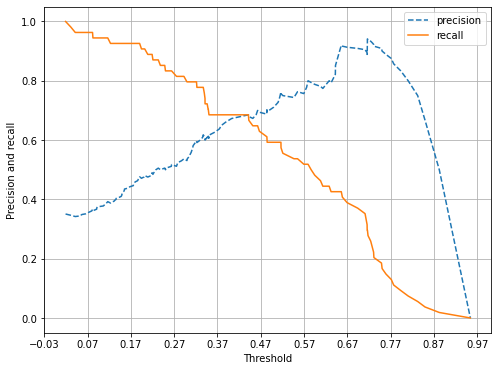

In [17]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]

def precision_recall_curve_plot(y_test, pred_proba_class1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold')
    plt.ylabel('Precision and recall')
    plt.legend(); plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, pred_proba_c1)

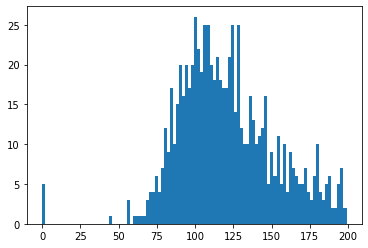

In [18]:
plt.hist(diabetes_data['Glucose'], bins=100)
plt.show()

In [19]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

mean_zero_feature = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_feature)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차행렬
[[90 10]
 [21 33]]
accuracy: 0.7987, precicion: 0.7674, recall: 0.6111, F1: 0.6804, AUC: 0.8059


In [27]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

from sklearn.preprocessing import Binarizer 
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

오차행렬
[[68 32]
 [13 41]]
accuracy: 0.7078, precicion: 0.5616, recall: 0.7593, F1: 0.6457, AUC: 0.8059
오차행렬
[[74 26]
 [15 39]]
accuracy: 0.7338, precicion: 0.6000, recall: 0.7222, F1: 0.6555, AUC: 0.8059
오차행렬
[[76 24]
 [18 36]]
accuracy: 0.7273, precicion: 0.6000, recall: 0.6667, F1: 0.6316, AUC: 0.8059
오차행렬
[[79 21]
 [19 35]]
accuracy: 0.7403, precicion: 0.6250, recall: 0.6481, F1: 0.6364, AUC: 0.8059
오차행렬
[[81 19]
 [20 34]]
accuracy: 0.7468, precicion: 0.6415, recall: 0.6296, F1: 0.6355, AUC: 0.8059
오차행렬
[[85 15]
 [20 34]]
accuracy: 0.7727, precicion: 0.6939, recall: 0.6296, F1: 0.6602, AUC: 0.8059
오차행렬
[[88 12]
 [21 33]]
accuracy: 0.7857, precicion: 0.7333, recall: 0.6111, F1: 0.6667, AUC: 0.8059
오차행렬
[[90 10]
 [21 33]]
accuracy: 0.7987, precicion: 0.7674, recall: 0.6111, F1: 0.6804, AUC: 0.8059


In [28]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차행렬
[[88 12]
 [21 33]]
accuracy: 0.7857, precicion: 0.7333, recall: 0.6111, F1: 0.6667, AUC: 0.8059
